In [1]:
from pathlib import Path
import requests
#from config import weather_api_key
import pandas as pd
import numpy as np
import scipy.stats as st
from pprint import pprint
import hvplot.pandas
import matplotlib.pyplot as plt

In [2]:
all_industries_df_file = pd.read_csv("GDP_Resources/all_industries-eng.csv")
agri_df_file = pd.read_csv("GDP_Resources/agri_eng.csv")
goods_df_file = pd.read_csv("GDP_Resources/good_producing-eng.csv")

In [3]:
# Drop empty rows
all_industries_df_file = all_industries_df_file.dropna()
agri_df_file = agri_df_file.dropna()
goods_df_file = goods_df_file.dropna()

In [4]:
# Display rows of each DataFrame after dropping empty rows
print("All Industries DataFrame:")
display(all_industries_df_file)

All Industries DataFrame:


,"Gross domestic product (GDP) at basic prices, by industry, provinces and territories, growth rates (x 1,000,000) c 1 2 3 4 5 6 7",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
9,Geography,2018,2021,2022,2021 to 2022,2018 to 2022
11,Newfoundland and Labrador,"30,128.60","30,128.00","29,690.10",-1.5,-1.5
12,Prince Edward Island,"6,267.30","6,899.70","7,109.90",3,13.4
13,Nova Scotia,"40,021.60","41,914.00","43,188.40",3,7.9
14,New Brunswick,"32,900.50","33,875.20","34,329.70",1.3,4.3
15,Quebec,"398,857.90","416,656.60","428,252.20",2.8,7.4
16,Ontario,"789,531.60","809,658.60","839,497.40",3.7,6.3
17,Manitoba,"67,372.80","66,275.40","68,483.20",3.3,1.6
18,Saskatchewan,"76,509.80","72,334.70","76,672.90",6,0.2
19,Alberta,"325,837.80","314,850.00","331,488.80",5.3,1.7


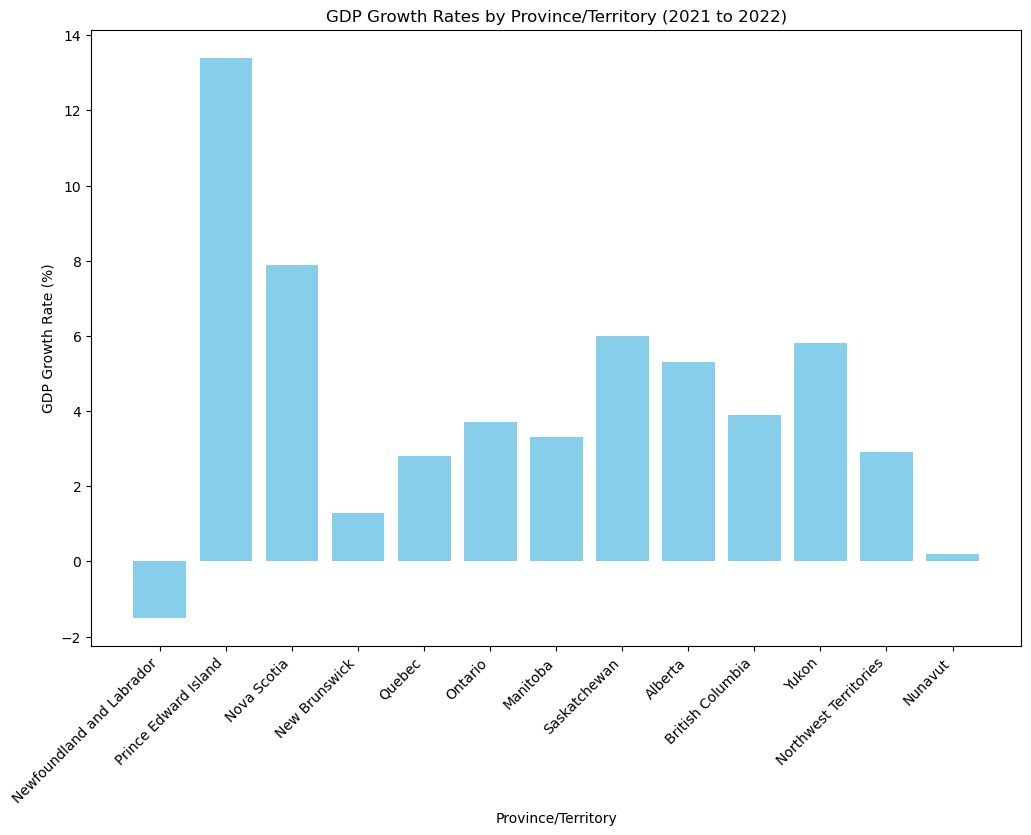

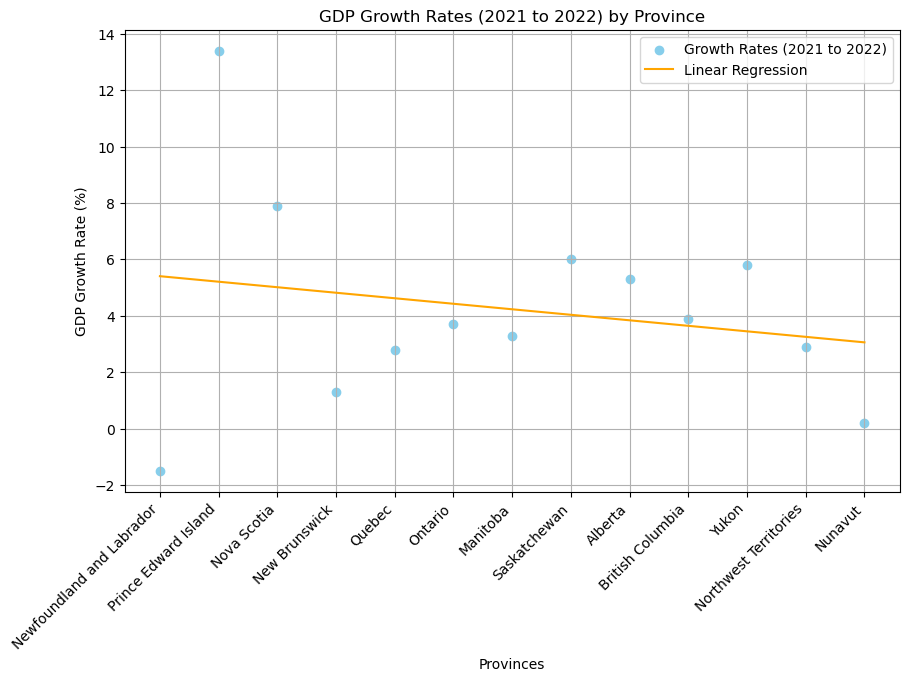

In [16]:
# Create a DataFrame from the provided data
data = {
    'Geography': ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Nunavut'],
    '2018': [30128.60, 6267.30, 40021.60, 32900.50, 398857.90, 789531.60, 67372.80, 76509.80, 325837.80, 270106.40, 2857.80, 4541.00, 3105.80],
    '2021': [30128.00, 6899.70, 41914.00, 33875.20, 416656.60, 809658.60, 66275.40, 72334.70, 314850.00, 288151.00, 3117.90, 4135.10, 3734.50],
    '2022': [29690.10, 7109.90, 43188.40, 34329.70, 428252.20, 839497.40, 68483.20, 76672.90, 331488.80, 299250.40, 3297.60, 4253.70, 3741.40],
    '2021_to_2022': [-1.5,13.4 ,7.9 ,1.3 ,2.8 ,3.7 ,3.3 ,6.0 ,5.3 ,3.9 ,5.8 ,2.9 ,0.2 ],
    #'2018_to_2022': [-1.5 ,-1.5 ,-1.5 ,-1.5 ,-1.5 ,-1.5 ,-1.5 ,-1.5 ,-1.5 ,-1.5 ,-1.5 ,-1.5 ,-1.5 ]
}

df = pd.DataFrame(data)

# Create a bar graph for GDP growth rates
plt.figure(figsize=(12,8))
plt.bar(df['Geography'], df['2021_to_2022'], color='skyblue')
plt.title('GDP Growth Rates by Province/Territory (2021 to 2022)')
plt.xlabel('Province/Territory')
plt.ylabel('GDP Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


# Data for GDP growth rates by province
provinces = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Nunavut']
growth_rates_2021_to_2022 = [-1.5, 13.4, 7.9, 1.3, 2.8, 3.7, 3.3, 6.0, 5.3, 3.9, 5.8, 2.9, 0.2]

# Create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(provinces)), growth_rates_2021_to_2022, color='skyblue', label='Growth Rates (2021 to 2022)')
plt.xticks(np.arange(len(provinces)), provinces, rotation=45, ha='right')
plt.xlabel('Provinces')
plt.ylabel('GDP Growth Rate (%)')
plt.title('GDP Growth Rates (2021 to 2022) by Province')
plt.grid(True)

# Linear regression
m, b = np.polyfit(np.arange(len(provinces)), growth_rates_2021_to_2022, 1)
plt.plot(np.arange(len(provinces)), m*np.arange(len(provinces)) + b, color='orange', label='Linear Regression')

# Show plot
plt.legend()
plt.show()

In [7]:
# Display rows of each DataFrame after dropping empty rows
print("Agriculture DataFrame:")
display(agri_df_file)

Agriculture DataFrame:


,"Gross domestic product (GDP) at basic prices, by industry, provinces and territories (x 1,000,000) c 1 2 3 4 5 6 7",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
9,Geography,2018,2019,2020,2021,2022
11,Newfoundland and Labrador,557.3,509.1,461.8,554.3,560.1
12,Prince Edward Island,431.2,494.4,414.2,472.3,461
13,Nova Scotia,"1,270.50","1,359.30","1,176.20","1,246.90","1,250.80"
14,New Brunswick,"1,121.80","1,296.70","1,170.60","1,282.70","1,202.30"
15,Quebec,"6,575.50","6,703.50","6,305.30","6,675.50","6,678.50"
16,Ontario,"7,545.50","7,827.10","8,258.30","8,675.10","8,788.90"
17,Manitoba,"3,145.30","3,075.80","3,187.20","2,747.90","3,296.40"
18,Saskatchewan,"6,655.90","7,242.00","7,288.00","4,656.80","6,781.60"
19,Alberta,"6,267.00","6,604.60","7,059.40","5,512.90","7,434.80"


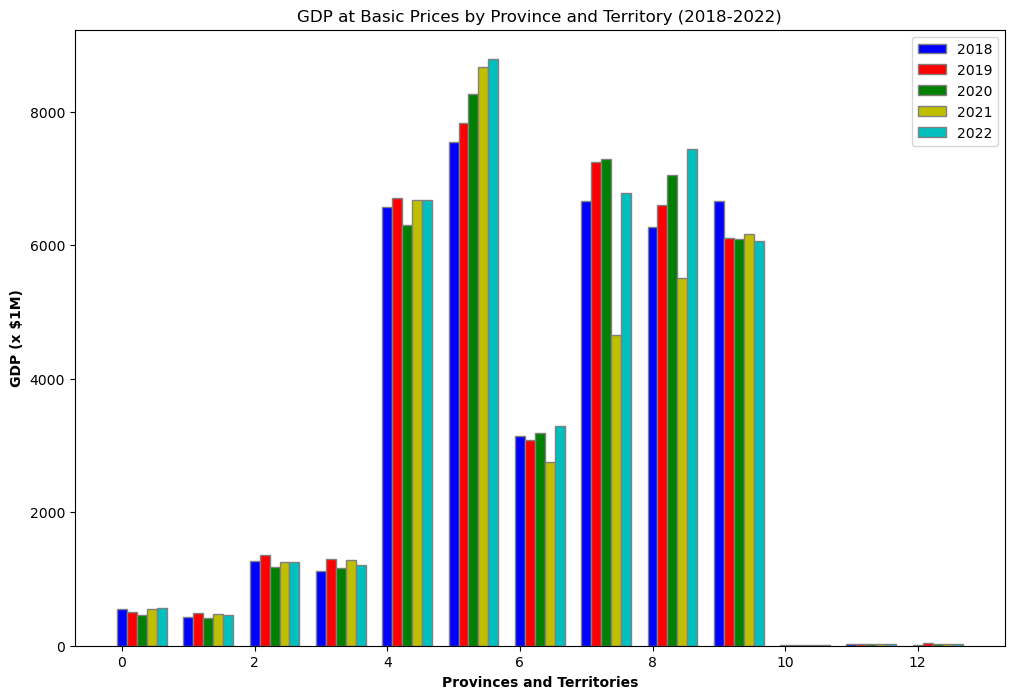

C:\Users\User\AppData\Local\Temp\ipykernel_22152\4147704675.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(years,m*np.arange(len(years))+b,'r-', color='orange')


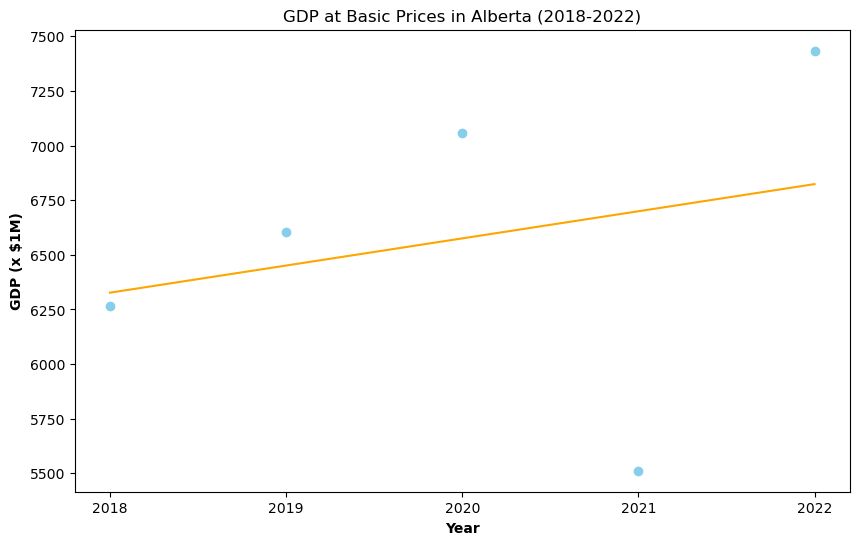

In [9]:
# Data
provinces = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Nunavut']
gdp_2018 = [557.3, 431.2, 1270.5, 1121.8, 6575.5, 7545.5, 3145.3, 6655.9, 6267.0, 6659.8, 6.2, 21.6, 13.3]
gdp_2019 = [509.1, 494.4, 1359.3, 1296.7, 6703.5, 7827.1, 3075.8, 7242.0, 6604.6, 6108.6, 8.2, 22.4, 39.8]
gdp_2020 = [461.8, 414.2, 1176.2, 1170.6, 6305.3, 8258.3, 3187.2, 7288.0, 7059.4, 6085.9, 8.3, 22.8, 31.4]
gdp_2021 = [554.3, 472.3, 1246.9, 1282.7, 6675.5, 8675.1, 2747.9, 4656.8, 5512.9, 6169, 7.8, 22.8,31.4]
gdp_2022 = [560.1, 461, 1250.8, 1202.3, 6678.5, 8788.9, 3296.4, 6781.6, 7434.8, 6058.6, 8.5, 24.4, 31.4]



import matplotlib.pyplot as plt
import numpy as np

# Create bar chart
barWidth = 0.15  # Adjust the width of each bar
r1 = np.arange(len(provinces))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(12,8))
plt.bar(r1, gdp_2018, color='b', width=barWidth, edgecolor='grey', label='2018')
plt.bar(r2, gdp_2019, color='r', width=barWidth, edgecolor='grey', label='2019')
plt.bar(r3, gdp_2020, color='g', width=barWidth, edgecolor='grey', label='2020')
plt.bar(r4, gdp_2021, color='y', width=barWidth, edgecolor='grey', label='2021')
plt.bar(r5, gdp_2022, color='c', width=barWidth, edgecolor='grey', label='2022')



# Add labels
plt.xlabel('Provinces and Territories', fontweight='bold')
plt.ylabel('GDP (x $1M)', fontweight='bold')
#plt.xticks(rotation=90)
#plt.ylabel('GDP Growth Rate (%)')
plt.title('GDP at Basic Prices by Province and Territory (2018-2022)')
plt.legend()
plt.show()


#Selecting a specific province or territory (Alberta)
province_territory = 'Alberta'
years = ['2018','2019','2020','2021','2022']
gdp_values = [6267.,6604.,7059.,5512.,7434.]

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(years,gdp_values, color='skyblue')
m,b = np.polyfit(range(len(years)), gdp_values ,1)
plt.plot(years,m*np.arange(len(years))+b,'r-', color='orange')

# Add labels
plt.xlabel('Year', fontweight='bold')
plt.ylabel('GDP (x $1M)', fontweight='bold')
plt.title(f'GDP at Basic Prices in {province_territory} (2018-2022)')
plt.show()

In [10]:
# Display rows of each DataFrame after dropping empty rows
print("Goods Producing DataFrame:")
display(goods_df_file)

Goods Producing DataFrame:


,"Gross domestic product (GDP) at basic prices, by industry, provinces and territories, growth rates (x 1,000,000) c 1 2 3 4 5 6 7",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
9,Geography,2018,2021,2022,2021 to 2022,2018 to 2022
11,Newfoundland and Labrador,"12,449.10","12,589.90","11,823.70",-6.1,-5
12,Prince Edward Island,"1,641.90","1,937.90","1,963.00",1.3,19.6
13,Nova Scotia,"7,573.60","8,136.20","8,271.70",1.7,9.2
14,New Brunswick,"7,870.30","8,250.10","8,265.80",0.2,5
15,Quebec,"107,846.40","110,574.50","112,031.90",1.3,3.9
16,Ontario,"181,093.80","181,084.20","184,745.90",2,2
17,Manitoba,"18,738.40","17,033.80","18,224.20",7,-2.7
18,Saskatchewan,"32,809.80","28,157.00","31,029.90",10.2,-5.4
19,Alberta,"127,068.50","120,041.00","128,894.10",7.4,1.4


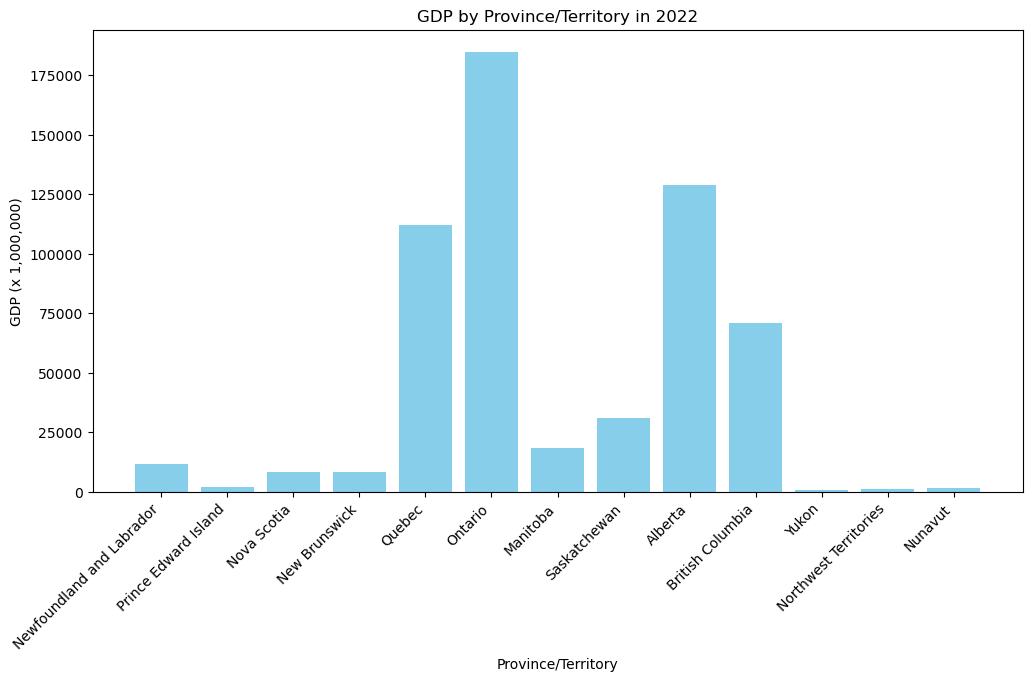

In [13]:
data = {
    'Geography': ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec',
                   'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Nunavut'],
    '2018': [12449.1, 1641.9, 7573.6, 7870.3, 107846.4, 181093.8, 18738.4, 32809.8, 127068.5, 64063.8, 597.3, 1525.3, 1239.3],
    '2021': [12589.9, 1937.9, 8136.2, 8250.1, 110574.5, 181084.2, 17033.8, 28157.0, 120041.0, 68265.2, 755.1, 1193.0, 1708.5],
    '2022': [11823.7, 1963.0, 8271.7, 8265.8, 112031.9, 184745.9, 18224.2, 31029.9, 128894.1, 70726.8, 842.6, 1181.8, 1728.2],
    '2021_to_2022': [-6.1, 1.3, 1.7, 0.2, 1.3, 2.0, 7.0, 10.2, 7.4, 3.6, 11.6, -0.9, 1.2],
    '2018_to_2022': [-5.0, 19.6, 9.2, 5.0, 3.9, 2.0, -2.7, -5.4, 1.4, 10.4, 41.1, -22.5, 39.4]
}

df = pd.DataFrame(data)


# Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(df['Geography'], df['2022'], color='skyblue')
plt.title('GDP by Province/Territory in 2022')
plt.xlabel('Province/Territory')
plt.ylabel('GDP (x 1,000,000)')
plt.xticks(rotation=45, ha='right')
plt.show()




